In [25]:
#!/usr/bin/env python
# -*- coding: UTF-8 -*-

# Notebook baseado no código de 
# 1. InDepth: Parameter Tuning for Decision Tree. Disponível em <https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3>.
# 2. How To Compare Machine Learning Algorithms in Python with scikit-learn. Disponível em <https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/> 
# 3. Visualizando e Criando Árvores de Decisão com Python. Disponível em <https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176>. 


import pydotplus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz



ITERACOES = 100
RANDOM_SEED = 55
SAMPLE_SIZE = 0.8

In [26]:
# Carregando a base
INPUT_FILE = "../../the_base.csv";
SEPARATOR = ";"
DECIMAL = ","

loaded_base = pd.read_csv(INPUT_FILE, sep=SEPARATOR,
                header=0, decimal=DECIMAL)

# Dividindo nossa base entre atributos (model) e classes.
attributes = loaded_base.drop(['FilmeId', 'Classe'], axis=1)
classes = loaded_base['Classe']

In [27]:
# Obtendo amostra
x_train, x_test, y_train, y_test =  model_selection.train_test_split(
                                                attributes, 
                                                classes, 
                                                test_size=SAMPLE_SIZE, 
                                                random_state=RANDOM_SEED);
              

# Avaliando Atributos

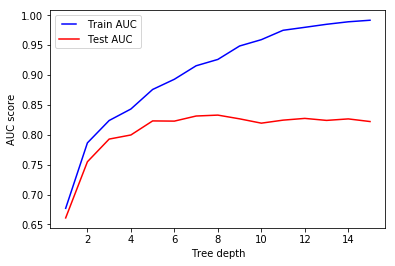

In [149]:
max_depths = np.linspace(1, 15, 15, endpoint=True)

train_results = []
test_results = []
criterion='entropy'
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
   dt.fit(x_train, y_train)

   train_pred = dt.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)

   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
  

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

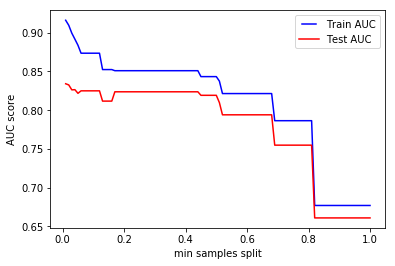

In [157]:
# MIN SAMPLE SPLITS
min_samples_splits = np.linspace(0.01, 1, 100, endpoint=True)

train_results = []
test_results = []

criterion='entropy'
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(criterion=criterion, max_depth=8, min_samples_split=min_samples_split)
   dt.fit(x_train, y_train)

   train_pred = dt.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = dt.predict(x_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

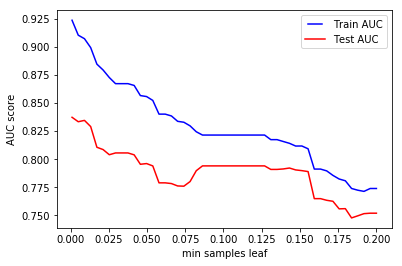

In [30]:
# MIN SAMPLES LEAFS
min_samples_leafs = np.linspace(0.001, 0.2, 50, endpoint=True)

train_results = []
test_results = []
criterion='entropy'
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion=criterion, max_depth=8, min_samples_leaf=min_samples_leaf)
   dt.fit(x_train, y_train)

   train_pred = dt.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = dt.predict(x_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

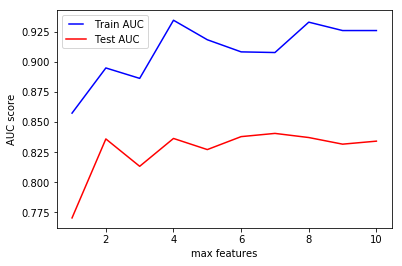

In [31]:
# MAX FEATURES
max_features = list(range(1,attributes.shape[1]))

train_results = []
test_results = []
criterion='entropy'
x_train_used = x_train.drop('Lucro - Milhões ($)', axis=1)
x_test_used = x_test.drop('Lucro - Milhões ($)', axis=1)
#x_train_used = x_train
#x_test_used = x_test
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion=criterion, max_depth=8, max_features=max_feature)
   dt.fit(x_train_used, y_train)

   train_pred = dt.predict(x_train_used)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = dt.predict(x_test_used)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel( 'AUC score' )
plt.xlabel( 'max features' )
plt.show()

# Comparando Modelos

In [32]:
# Comparando modelos diversos
models = {"Default": DecisionTreeClassifier(),
          
        "Entropy\nMaxDep=8\nMinSamplesSplit\nMinSamplesLeaf": DecisionTreeClassifier(criterion="entropy",
                                         max_depth=8, 
                                         min_samples_split=0.3, 
                                         min_samples_leaf=0.01
                                        ),
         "Entropy\nMaxDep=8": DecisionTreeClassifier(criterion="entropy",
                                         max_depth=8),
         "MinSamples:\nSplit & Leaf": DecisionTreeClassifier(min_samples_split=0.3, 
                                         min_samples_leaf=0.01
                                        ),
         "Gini\nMaxDep=8": DecisionTreeClassifier(criterion="gini",
                                         max_depth=8
                                        )}

In [33]:
# Comparando modelos
def getResults(verbose=True, seed=RANDOM_SEED):
    results = []
    names = []
    scoring = 'balanced_accuracy'
    if(verbose):
        print("%s\t%s\t\t%s" % ("Modelo","Média", "STD"))
    for name, model in models.items():
        kfold = model_selection.KFold(n_splits=10, random_state=RANDOM_SEED)
        cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        if(verbose):
            print("%s\t%f\t%f" % (name, cv_results.mean(), cv_results.std()))
    return results, names

63.333333333333336

In [159]:
# Executando ITERAÇÕES.
results = list()
for i in range(ITERACOES):
    print(f"Iteração {i+1}")
    result, names = getResults(verbose=False, seed=i)
    results.append((result,names))
    
# Preparando os valores para plotagem
resultados = {}
nomes = results[1][1]
for n in nomes:
    resultados[n]=list()

for values, names in results:
    for n, v in zip(names, values):
        resultados[n] += v.tolist()


labels, data = [*zip(*resultados.items())]

Iteração 1
Iteração 2
Iteração 3
Iteração 4
Iteração 5
Iteração 6
Iteração 7
Iteração 8
Iteração 9
Iteração 10
Iteração 11
Iteração 12
Iteração 13
Iteração 14
Iteração 15
Iteração 16
Iteração 17
Iteração 18
Iteração 19
Iteração 20
Iteração 21
Iteração 22
Iteração 23
Iteração 24
Iteração 25
Iteração 26
Iteração 27
Iteração 28
Iteração 29
Iteração 30
Iteração 31
Iteração 32
Iteração 33
Iteração 34
Iteração 35
Iteração 36
Iteração 37
Iteração 38
Iteração 39
Iteração 40
Iteração 41
Iteração 42
Iteração 43
Iteração 44
Iteração 45
Iteração 46
Iteração 47
Iteração 48
Iteração 49
Iteração 50
Iteração 51
Iteração 52
Iteração 53
Iteração 54
Iteração 55
Iteração 56
Iteração 57
Iteração 58
Iteração 59
Iteração 60
Iteração 61
Iteração 62
Iteração 63
Iteração 64
Iteração 65
Iteração 66
Iteração 67
Iteração 68
Iteração 69
Iteração 70
Iteração 71
Iteração 72
Iteração 73
Iteração 74
Iteração 75
Iteração 76
Iteração 77
Iteração 78
Iteração 79
Iteração 80
Iteração 81
Iteração 82
Iteração 83
Iteração 84
I

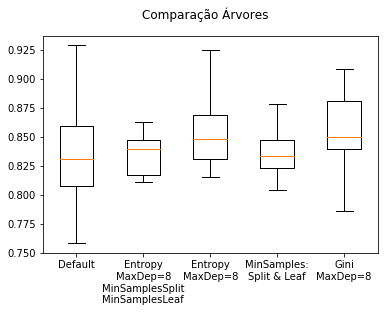

In [160]:
# Plotando.

fig = plt.figure()
fig.suptitle("Comparação Árvores")
ax = fig.add_subplot(111)
plt.boxplot(data)
ax.set_xticklabels(labels)
plt.show()

In [169]:
# Visualizando a Árvore de Decisão: 
chosen_model = models["Entropy\nMaxDep=8"]
#chosen_model = models["Entropy\nMaxDep=8\nMinSamplesSplit\nMinSamplesLeaf"]
#chosen_model = models['Default']
# Verificando os resultados:
chosen_model.fit(attributes, classes)
dotfile = StringIO()
export_graphviz(chosen_model, out_file=dotfile,  
            filled=True, rounded=True, feature_names = attributes.columns, class_names = ["Perdedor", "Vencedor"],
            special_characters=True)

graph=pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png("dtree.png")

True

In [170]:
feature_names = attributes.columns
importances = chosen_model.feature_importances_

features = [];
for f,i in zip(feature_names, importances):
    features.append((f,i*100))
features.sort(key=lambda fi: fi[1], reverse=True) 


In [171]:
template = "{0:40} {1:.2f}"
print("{0:40}{1:4}".format("Atributo","Importância(%)"))
print("-"*54)
for f in features:
    print(template.format(f[0], f[1]))


Atributo                                Importância(%)
------------------------------------------------------
Orçamento - Milhões ($)                  28.94
Bilheteria - Milhões ($)                 25.92
Diretor/Diretora Indicado ao Oscar       10.85
Gênero                                   8.59
Tomatômetro - Rotten Tomatoes (%)        6.72
Vencedor do Golden Globes                6.44
Metacritics                              3.63
Lucro - Milhões ($)                      3.32
Vencedor do Bafta                        3.06
LetterBoXD                               2.23
Ator/Atriz Indicado ao Oscar             0.29


In [172]:
29+26

55

In [173]:
55+32

87